**Prevendo valores de imóveis** 📈

Na aula de hoje, vamos explorar um dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel, será que é possível?

**Atributos:**

* Ordem: Coluna de ID.
* Valor: Valor do imóvel.
* Area: Tamanho da área do imóvel.
* IA: Idade do imóvel.
* Andar: Quantidade de andares.
* Suites: Quantidade de suítes.
* Vista: Se o imóvel possúi uma boa vista ou não.
* DistBM: Distancia do Imovel do Mar.
* SemRuido: Se o imóvel é localizado em uma região calma ou não.
* AV100m: DistPróximo à área verde.

Vamos começar a trabalhar com os dados!

In [1]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats


In [4]:
# Subindo a base de dados
imoveis = pd.read_csv('Valorizacao_Ambiental.csv', sep=';')


In [5]:
# Explorando os dados
imoveis.head()


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [7]:
# REgressão Linear = quando temos valores contínuos  / Binários = 0 ou 1 / 0 é não e 1 é sim
imoveis.shape


(172, 10)

In [9]:
# Analisando valores nulos na base / Não temos nenhum dado com valores nulos na base
imoveis.isnull().sum()


Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [10]:
# estatística básica dos dados
imoveis.describe().round(2)


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


# Identificando a variável target:

Text(0.5, 1.0, 'Histograma de variável valor')

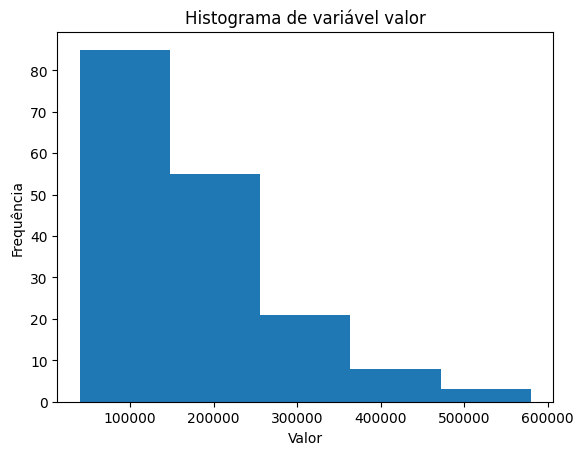

In [12]:
# Histograma da variável target

plt.hist(imoveis['Valor'], bins=5)

plt.ylabel('Frequência')
plt.xlabel('Valor')

plt.title('Histograma de variável valor')

# Neste primeiro momento conseguimos enxergar que a maior concentração de dados estão nos imóveis de menor valor, ou seja, temos mais imóveis de menor valor na base


Vamos transformar o formato da variável principal para raiz quadrada.

Visualizar dados no formato da raiz quadrada pode ser uma boa opção! A transformação pode ajudar a mostrar a relação proporcional entre diferentes quantidades de uma maneira mais clara e intuitiva.

Utilizando a transformação da escala em raiz quadrada, o valor será ajustada de forma que os valores menores sejam ampliados em relação aos valores maiores.

In [13]:
# Criando uma coluna para sabermos a raiz quadrada
# Raiz quadrada da coluna valor
# a ideia da raiz quadrada é ampliar os valores que estão menores para poder conhecer melhor a distribuição dos dados /  a frequência

imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])


In [14]:
imoveis.head(3)


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894


Text(0.5, 1.0, 'Histograma de variável valor após raiz aplicada')

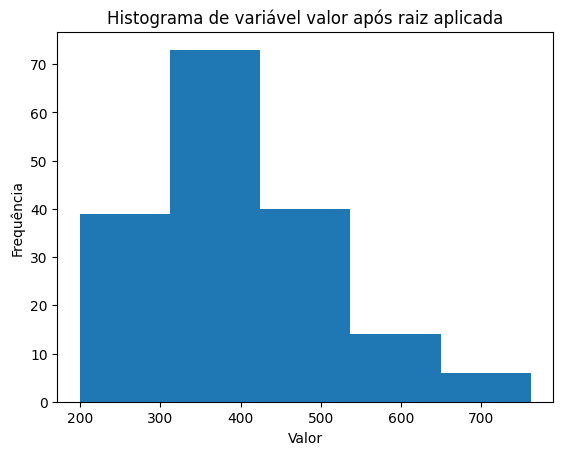

In [15]:
plt.hist(imoveis['raiz_valor'], bins=5)

plt.ylabel('Frequência')
plt.xlabel('Valor')

plt.title('Histograma de variável valor após raiz aplicada')


# Analisando as variáveis quantitativas

Como próximo passo, vamos analisar nossas variáveis quantitativas.

Antes de construir nosso modelo, é muito importante avaliar se nesse caso podemos ter outliers ou valores extremos.

Text(0, 0.5, 'Qtd Suites')

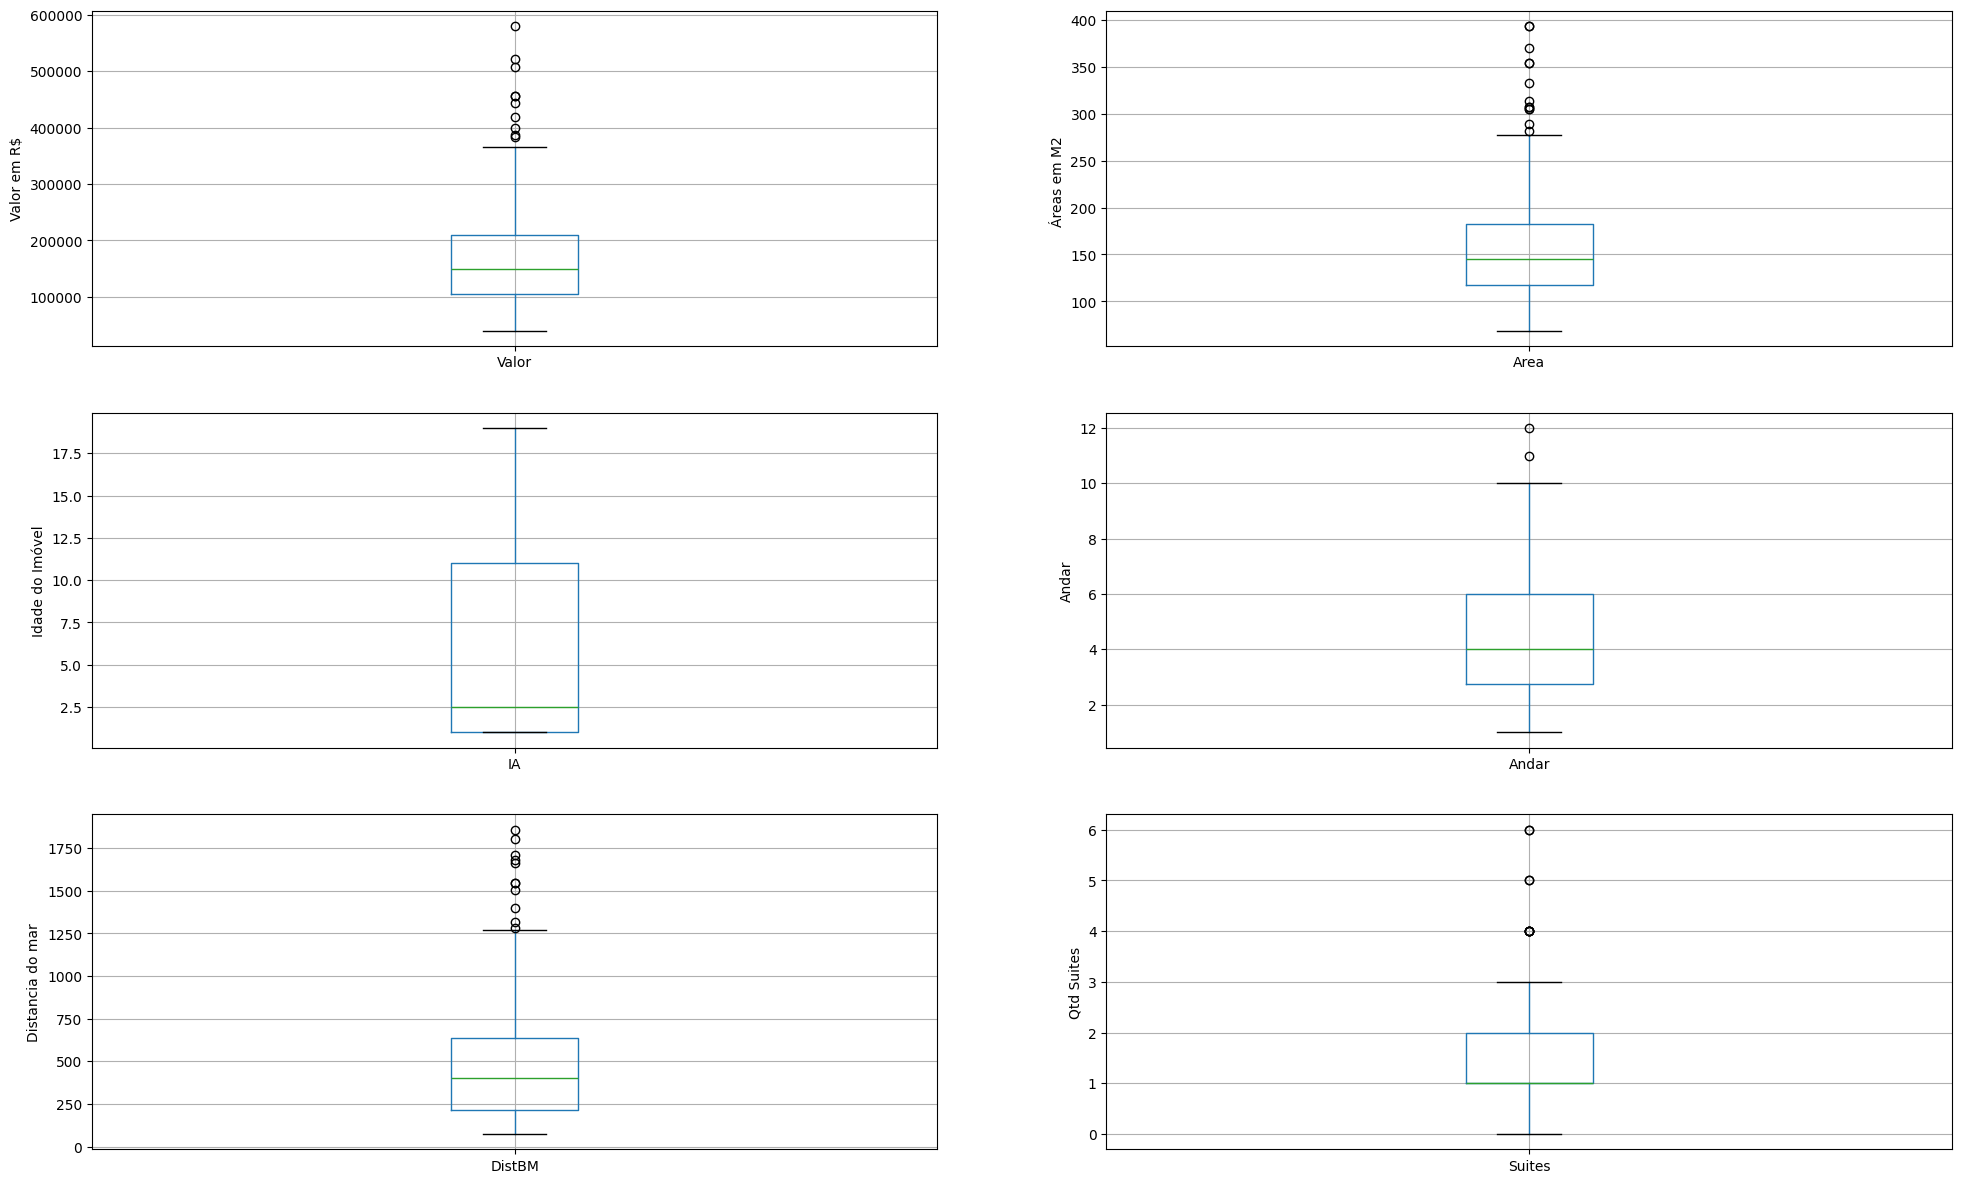

In [17]:
# Avaliando as variáveis quantitativas Boxplot: para visualizar Outliers
#Verificando se temos outliers
# Varios boxplot juntos

plt.figure(figsize=(24,20)) #tamanho do quadro geral

plt.subplot(4,2,1) #--> 1 = 1° plot

# plt.subplot(4, 2, 1) cria uma figura com uma grade de 4 linhas por 2 colunas (ou seja, 8 subplots no total), e posiciona o próximo gráfico no primeiro subplot.

fig = imoveis.boxplot(column='Valor')
fig.set_title('') # título vazio porque são vários boxplot
fig.set_ylabel('Valor em R$')

plt.subplot(4,2,2)
fig = imoveis.boxplot(column='Area')
fig.set_title('') 
fig.set_ylabel('Áreas em M2 ')

plt.subplot(4,2,3)
fig = imoveis.boxplot(column='IA')
fig.set_title('') 
fig.set_ylabel('Idade do Imóvel')

plt.subplot(4,2,4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('') 
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('') 
fig.set_ylabel('Distancia do mar')

plt.subplot(4,2,6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('') 
fig.set_ylabel('Qtd Suites')

# Verifica-se no primeiro plot que a maior concentração está de fato entre os valores 100 e 200 k
# O risquinho verde é a média dos dados concentrados


# Analisando correlações

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<Axes: >

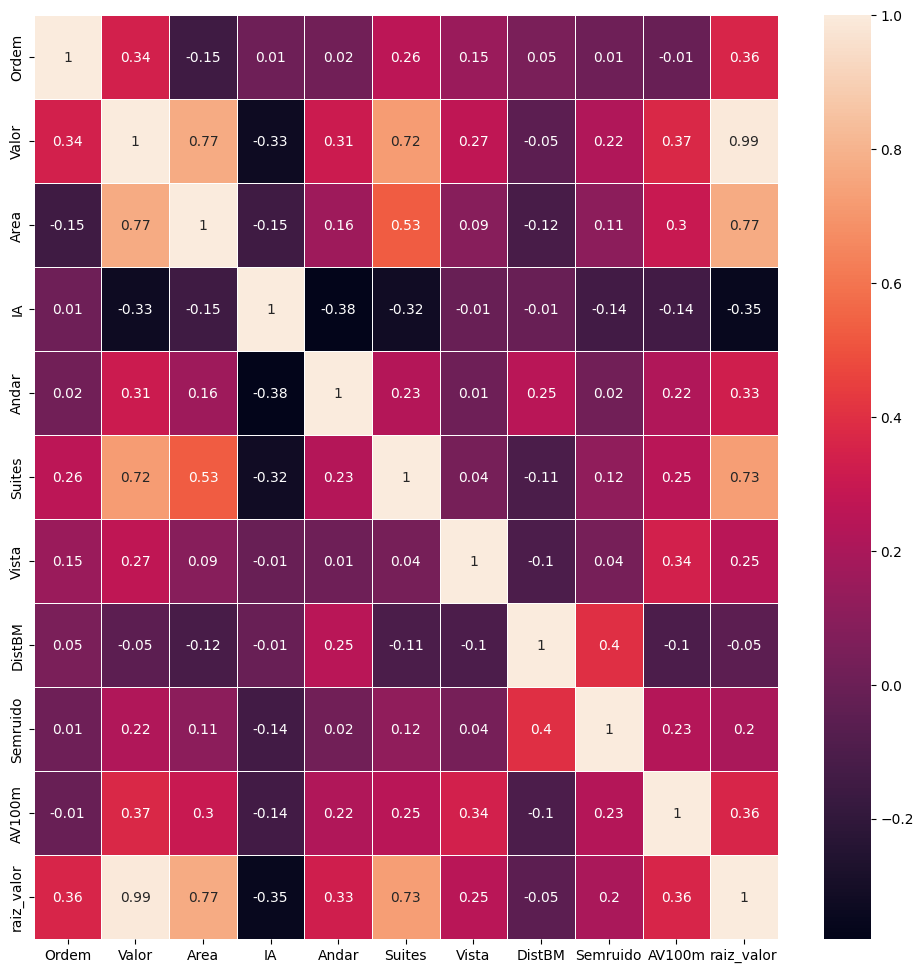

In [22]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax) #annot pra poder mostrar os valores das variáveis /linewidths = tamanho da linha /  ax é uma variavel
                                                                    
 # Quanto mais próximo de 1, tem mais relações entre si, o oposto é verdadeiro 
 # Exemplo: Uma variável aumenta na mesma proporção que a outra também aumenta / é o crescimento em conjunto                                                                


Text(0.5, 1.0, 'Área do imóvel x Valor')

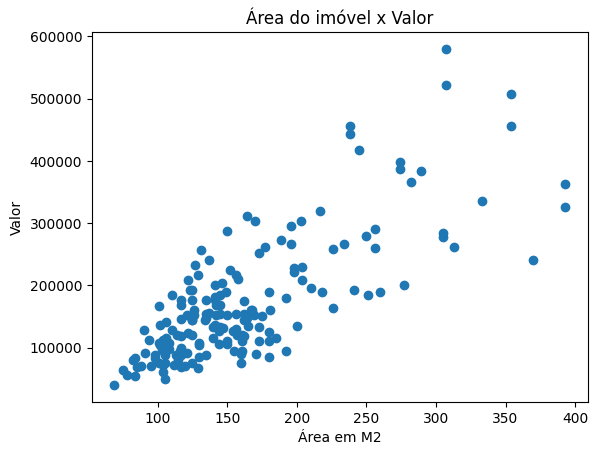

In [23]:
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel('Área em M2')
plt.ylabel('Valor')
plt.title('Área do imóvel x Valor')


Percebam que quanto maior o área do imovel maior o valor em média.

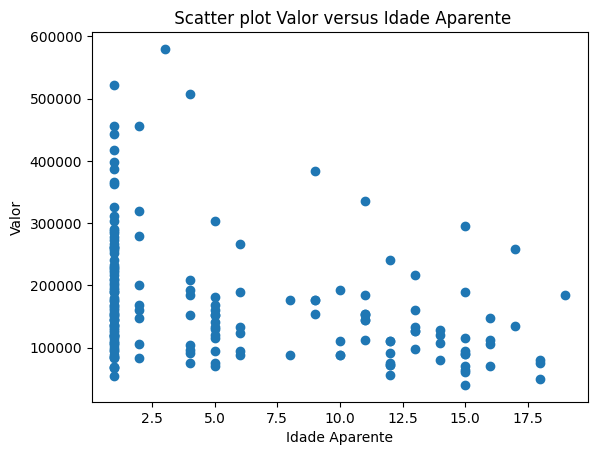

In [24]:
plt.scatter('IA', 'Valor', data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Idade Aparente");


In [26]:
imoveis.head()


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


# Analisando variáveis qualitativas

Analisando as variáveis qualitativas:

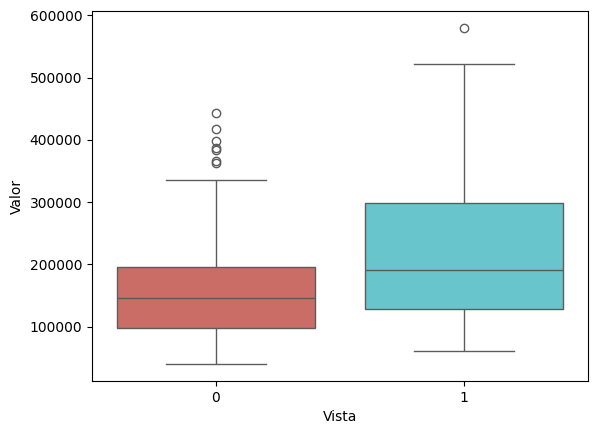

In [31]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista

sb.boxplot(x='Vista', y='Valor', data=imoveis, hue='Vista', palette='hls', legend=False);


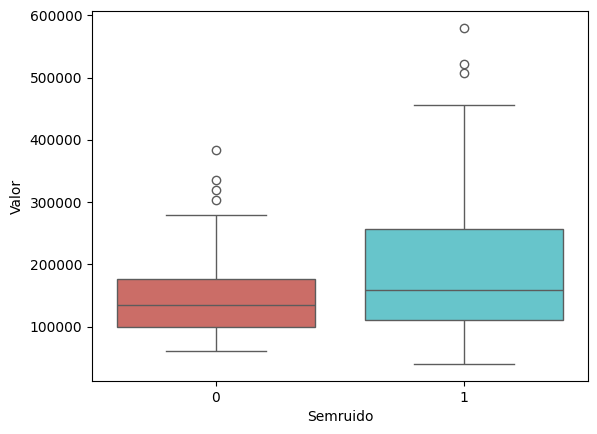

In [33]:
sb.boxplot(x='Semruido', y='Valor', data=imoveis, hue='Semruido', palette='hls', legend=False);


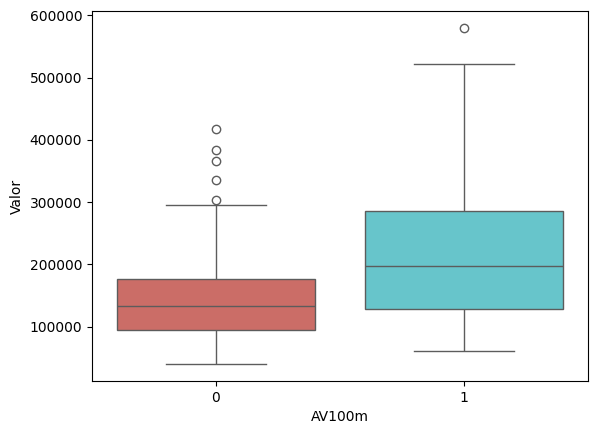

In [34]:
sb.boxplot(x='AV100m', y='Valor', data=imoveis, hue='AV100m', palette='hls', legend=False);


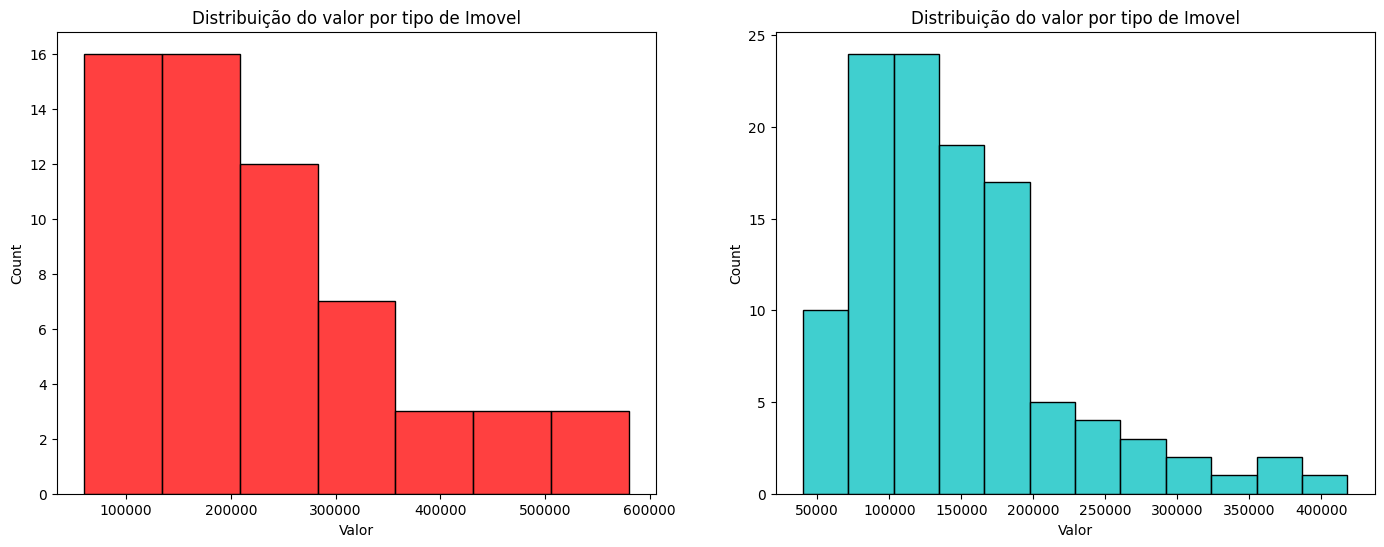

In [43]:
#Distruição de Gastos por Area Verde próxima
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sb.histplot(imoveis[(imoveis.AV100m == 1)]["Valor"],color='r',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel');

ax=fig.add_subplot(122)
sb.histplot(imoveis[(imoveis.AV100m == 0)]['Valor'],color='c',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel');


# Realisando testes estatísticos:

** Colocando em prática o modelo de Machine Learning  

Será que o valor é afetado por imóveis sem ruídos? Vamos comprovar com o teste estatístico Qui-Quadrado.

O teste Qui-Quadrado é uma técnica estatística utilizada para avaliar a associação entre duas variáveis categóricas em uma tabela de contingência.

Ele pode ser utilizado para testar a hipótese de que não há relação entre as duas variáveis ou para identificar se uma variável afeta a outra.

Nesse caso, estamos buscando descobrir a associação entre duas variáveis:  faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal).

Para transformar a coluna de valor (quantitativa), vamos criar uma faixa de valores utilizando os quartis.




In [46]:
# Modelo de Regressão Linear Simples 

# Para isso vamos importar da Biblioteca o LinearRegression / Regressão Linear Múltipla

from sklearn.linear_model import LinearRegression

# Criando um Objeto de Regressão Linear

lr = LinearRegression()

# Precisamos estanciar o modelo com as variáveis


Para começarmos um Modelo de ML precisamos separar os dados em X e Y  

Em x colocamos as variáveis independentes e em Y colocamos as variáveis dependentes (target, valor, por exemplo)

Em termos mais simples, as variáveis preditoras são os fatores que você acredita influenciar a variável de interesse (a variável dependente).  

As variáveis preditoras podem ser tanto qualitativas quanto quantitativas:  

Variáveis qualitativas (categóricas): São variáveis que representam categorias ou grupos distintos. Exemplos incluem gênero (masculino/feminino), tipo de imóvel (apartamento/  casa), cor (vermelho/azul/verde), entre outros. Essas variáveis podem ser codificadas numericamente para serem usadas em modelos de previsão.  

Variáveis quantitativas: São variáveis numéricas que representam quantidade ou medida. Exemplos incluem idade, preço, altura, peso, etc.  

Para esclarecer com um exemplo, vamos supor que você está construindo um modelo para prever o preço de imóveis. Nesse caso:  

Variável dependente: Preço do imóvel (a variável que você deseja prever).  
Variáveis preditoras (independentes):  
Quantitativas: Tamanho do imóvel (em metros quadrados), número de quartos, idade do imóvel.  
Qualitativas: Tipo de imóvel (apartamento/casa), localização (bairro).  
Em um modelo de regressão, por exemplo, as variáveis preditoras seriam usadas como entradas para prever o valor da variável dependente.  

Resumindo:  

Variáveis preditoras (independentes): Variáveis usadas para prever a variável de interesse.  
Variáveis qualitativas (categóricas): Tipo de variável que pode ser usada como variável preditora ou resposta, dependendo do contexto.  

In [47]:
# X contém as variáveis preditoras ou independentes

x = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y contém a variável target ou dependente / é o que eu quero encontrar com a predição, ou seja, qual valor aproximado dos imóveis

y = imoveis[['Valor']]


In [48]:
x


,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
0,168,1,1,1,1,5,0,294
1,129,0,1,1,0,6,0,1505
2,218,1,1,0,0,8,1,251
3,180,1,12,0,0,4,0,245
4,120,1,15,1,0,3,0,956
...,...,...,...,...,...,...,...,...
167,82,0,14,1,0,2,0,485
168,134,0,11,1,1,2,1,827
169,135,2,9,1,1,3,1,414
170,141,2,1,0,0,6,0,305


In [49]:
y


,Valor
0,160000
1,67000
2,190000
3,110000
4,70000
...,...
167,80000
168,144000
169,176000
170,199956


In [51]:
from sklearn.model_selection import train_test_split

#Separando os dados de Treino e Teste
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional. É a semente aleatória.
# Geralmente o tamanho da amostra vai depender do tamanho da base. Geralmente usamos 0.2 (20%), mas pode ser utilizado outras %
#  lr porque eu estanciei o meu modelo em lr

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=101)


In [52]:
#  Treinando o Modelo
lr.fit(x_train, y_train)


LinearRegression()

In [54]:
# Calculando o valor predito da variável resposta na amostra de teste (é a previsão de valor)
# Utilizamos a base de teste porque eu preciso realizar as predições em dados que o meu algorítimo nunca viu na vida! Por isso que a gente faz a separação de teste
y_pred = lr.predict(x_test)


In [55]:
# Primeiro, vamos olhar o Intercepto e os Coeficientes da Regressão.
# Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais
# Em termos gráficos, o Intercepto é o ponto onde a linha de regressão cruz o eixo vertical (eixo y)

print('Intercepto: ', lr.intercept_)

# Então será nesse valor que vai traçar pra gente (-40165.8752773) a nossa base do modelo /  o corte da reta será nesse valor da predição


Intercepto:  [-40165.8752773]


In [56]:
# Os coeficientes da regressão linear represenatam as inclinações da linha de regressão para cada variável
#  Aqui estamos trazendo o coeficiente linear de cada item do Data Frame.

coeficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)


In [57]:
coeficients


,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


<function matplotlib.pyplot.show(close=None, block=None)>

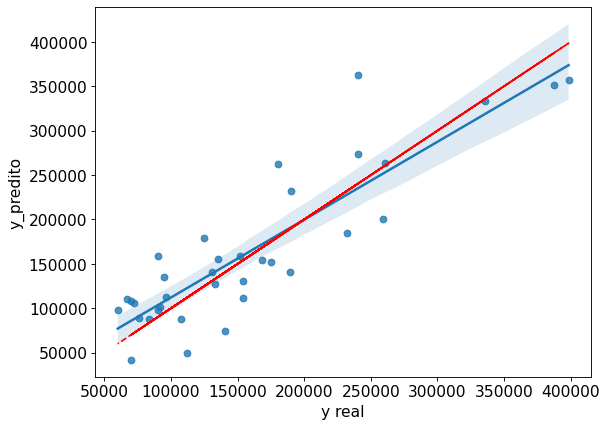

In [59]:
# Agora vamos plotar para saber o quanto este modelo está errando ou acertando. Quando temos o visual é mais fácil de entender.

fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x= y_test, y = y_pred)
ax.set(xlabel= 'y real', ylabel='y_predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show
# Comparação dos dados preditos com os valores reais que guardamos na nossa base de teste
# A reta vermelha é a minha predição do modelo e a linha azul é o comportamento real, ou seja, os dados reais da base


# Validando a performance do modelo

In [60]:
# Avaliando o Modelo / para verificarmos de fato se ele está bom ou não. / Não existe modelo perfeito ... se ele sempre acerta (100%) há algo de errado, 
# pois isso significa que o nosso algorítimo decorou a base e desta forma não tem necessidade de ter o modelo, perde todo o sentido. 

# Vamos avaliar:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [61]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print ('MSE', MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print ('r2', r2)    # (R-quadrado)

# Resultado  = 75%


MAE 34422.98857094557
MSE 1844288772.178987
r2 0.7584591969125033


# Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem (75% de acerto), mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

Vamos testar?

In [62]:
from sklearn.tree import DecisionTreeRegressor


In [63]:
# Criando o modelo de DecisionTreeRegressor
# max_depth=10 --> a quantidade de ramificações/hierarquia que terá na minha árvore
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=101)

In [64]:
y_pred_model_dtr = model_dtr.predict(x_test)


In [66]:
# Avaliando o Modelo

MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

# Resultado = 57%


MAE 44913.75102040816
MSE 3223969337.3848395
r² 0.577766695417574


# Avaliando com SVR

Vamos agora testar um outro tipo de algoritmo para analisar a performace, o Support Vector Regression. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [67]:
from sklearn.svm import SVR


In [72]:
# Criando o modelo de SVR
svr = SVR(kernel='linear')


In [73]:
svr.fit(x_train, y_train)


C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [74]:
y_pred_svr = svr.predict(x_test)


In [75]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

# Resultado = 59%


MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546


Com base em alguns dos nossos testes, podemos concluir que o modelo de regressão linear performou melhor do que os demais modelo!